# Análise de Credito - Formação Cientista de dados
Projeto final

"Nossa taxa de inadimplência é de 35%. Você acha que com o uso das suas técnicas, conseguimos baixar este índice para pelo menos, 25%?"

In [1]:
# Começarei importando o Random Forest e utilizando técnicas de arvore de classificação
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [4]:
# Agora importarei o arquivo .csv, separando os cabealhos por ";" e com o parametro de cabeçalho como verdadeiro
credito  = read.csv("credito_WKD.csv", sep = ';', header=T)

In [5]:
head(credito)

CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim
sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom
<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim
sem cheque,36,existente e pago,educação,9055,nenhuma economia conhecida,1<=X<4,2,masculino solteiro,nenhum,4,nenhuma conhecida,35,nenhum,gratuitamente,1,não especializado,2,sim,bom


In [6]:
summary (credito)

    CHEQUEESPECIAL  USO_CREDITO                               HISTORICO_CREDITO
 <0        :274    Min.   : 4.0   atrasos anteriores                   : 88    
 >=200     : 63    1st Qu.:12.0   crítica / outros de crédito existente:293    
 0<=X<200  :269    Median :18.0   existente e pago                     :530    
 sem cheque:394    Mean   :20.9   sem créditos/todos pagos             : 40    
                   3rd Qu.:24.0   todos pagos                          : 49    
                   Max.   :72.0                                                
                                                                               
               PROPOSITO   BALANCO_ATUAL                  BALANCO_MEDIO_CREDITO
 Computador/TV      :280   Min.   :  250   <100                      :603      
 carro novo         :234   1st Qu.: 1366   >=1000                    : 48      
 mobilia/equipamento:181   Median : 2320   100<=X<500                :103      
 carro usado        :103   Mean   : 3271

In [7]:
# Ao todo tem-se 1000 usuários para fazer a anaçise, como não há dois arquivos de dados para teste e treino
# este será dividido.
# Será gerado uma amostra dos dados e dividido em 70% treino e 30% teste
# A amostra pode ser substituivel
amostra = sample(2,1000, replace = T, prob= c(0.7, 0.3))
creditotreino = credito[amostra==1,]
creditoteste = credito[amostra==2,]

In [8]:
head(creditotreino)

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
1,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
4,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
5,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim
6,sem cheque,36,existente e pago,educação,9055,nenhuma economia conhecida,1<=X<4,2,masculino solteiro,nenhum,4,nenhuma conhecida,35,nenhum,gratuitamente,1,não especializado,2,sim,bom
7,sem cheque,24,existente e pago,mobilia/equipamento,2835,500<=X<1000,>=7,3,masculino solteiro,nenhum,4,seguro de vida,53,nenhum,própria,1,especializado,1,sim,bom
8,0<=X<200,36,existente e pago,carro usado,6948,<100,1<=X<4,2,masculino solteiro,nenhum,2,carro,35,nenhum,alugada,1,alta qualificação/autonomo/Gerente,1,sim,bom


In [38]:
# criação da variavel floresta que ira receber os atributos do credito treino e gerar a arvore de classificação
#floresta = randomForest (CLASSE ~. (classe e atributos), data=creditotreino (dado a ser pego), ntree = 150 (numero de arvores envolvidas), importance = T)
floresta = randomForest (CLASSE ~., data=creditotreino, ntree = 300, importance = T)

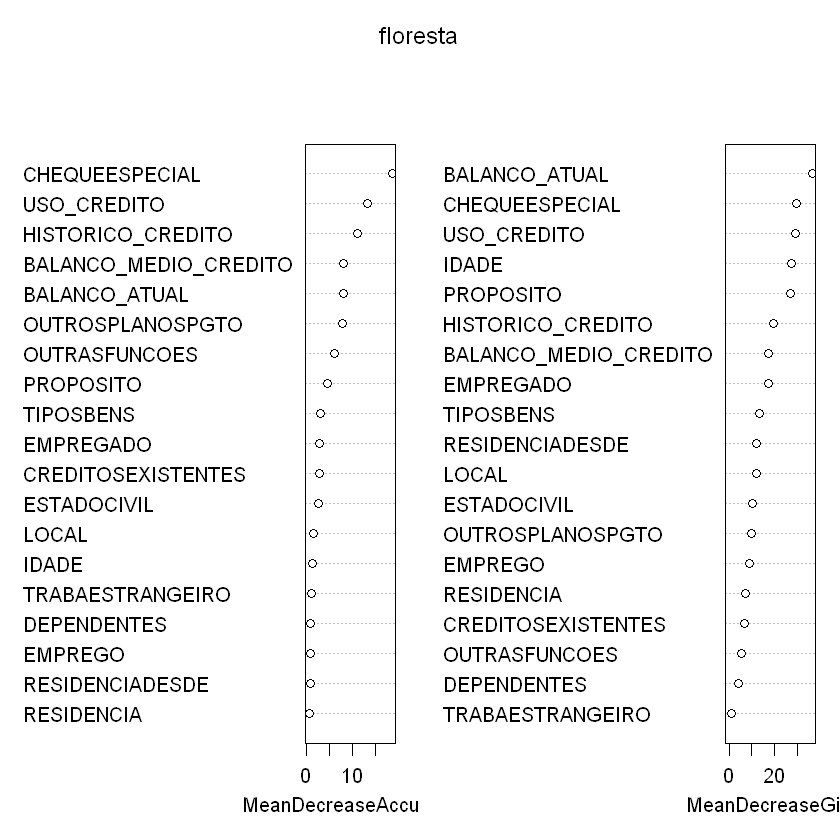

In [39]:
# Plotagem da variável
varImpPlot (floresta)

In [40]:
# Agora gero a  previsão e depois a tabela de confusão para ver a porcentagem de acerto e de erro
previsao = predict(floresta, creditoteste)

In [41]:
confusao = table(previsao,creditoteste$CLASSE)

In [42]:
confusao

        
previsao bom ruim
    bom  175   55
    ruim  15   35

In [43]:
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto

[1] 0.75

In [44]:
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)
taxaerro

[1] 0.25

### Com o algoritmo acima foi assegurado uma taxa de erro de 25%, ou seja ele pode prever com maior precisão do que o atual com 35%